In [1]:
%matplotlib inline
import os

In [2]:
from treatment_sims_2023_02_21 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
base='sims/2023-04-06'

In [11]:
fname='/Users/bblais/tmp/test.asdf'
if not os.path.exists(fname):
    R=Results('sims/2023-04-06/deficit 5 neurons 7.5 mu_c 2 sigma_c 12 blur.asdf')    
    savevars(fname,'R')
else:
    print("Already saved ",fname)

Already saved  /Users/bblais/tmp/test.asdf


In [12]:
loadvars(fname)

Found ['R']


In [15]:
R.sequence_weights[0][1].shape

(5, 722)

sims/2023-04-06/deficit 5 neurons 7.5 mu_c 2 sigma_c 12 blur.asdf


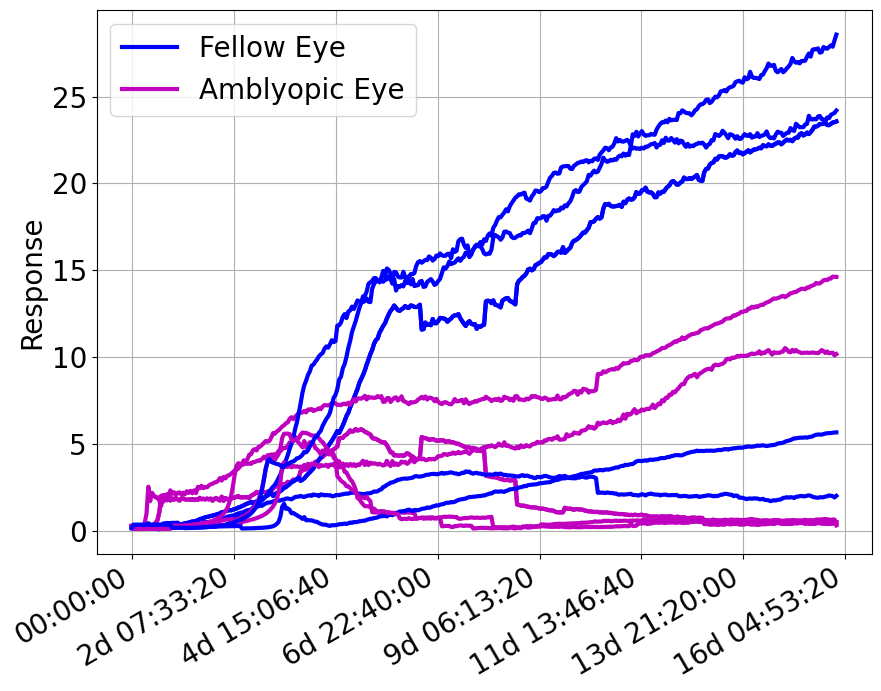

In [6]:
plot(R.t,R.y[:,0,strong_i],'b',label='Fellow Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Amblyopic Eye')

for n in range(R.num_neurons):
    plot(R.t,R.y[:,n,0],'m')
    plot(R.t,R.y[:,n,1],'b')
    
    
ylabel('Response')
legend()
print(R.fname)
reformat_time_axis()    

In [7]:
R.sequence_weights

[(array([[-0.00460394,  0.00661636, -0.0011384 , ...,  0.0081791 ,
          -0.00891857, -0.00804376],
         [-0.00392538,  0.00211657,  0.00035118, ...,  0.00014827,
           0.0033427 ,  0.00769509],
         [ 0.00268659, -0.00366141,  0.00582454, ...,  0.00161493,
          -0.00744081, -0.00101799],
         [-0.00279833, -0.003478  , -0.00805553, ...,  0.00604729,
           0.00755325,  0.00979344],
         [ 0.00258134,  0.00736226, -0.00470483, ..., -0.00429383,
          -0.00282802,  0.00689488]]),
  array([[-0.01944545, -0.00455539, -0.01020984, ...,  0.20184188,
           0.20748207,  0.31129927],
         [ 0.29455362,  0.27330572,  0.20358877, ...,  0.00096884,
          -0.03232209, -0.02753086],
         [ 0.02844642,  0.00952431,  0.01432793, ..., -0.0073902 ,
          -0.01938466, -0.05403755],
         [-0.106761  , -0.10290264, -0.08989863, ..., -0.0378523 ,
          -0.02337551, -0.01705826],
         [-0.00213907,  0.00672629, -0.00851443, ...,  0.00214

In [7]:
R1=Results('sims/2023-04-06/deficit 5 neurons 7.5 mu_c 2 sigma_c 12 blur.asdf')    

In [8]:
len(R1.all_responses[0])

2

In [16]:
loadvars(base+"/deficit_results.asdf")
all_params=[Struct(_) for _ in all_params]

Found ['all_params', 'RR', 'rf_size', 'eta', 'number_of_neurons', 'number_of_processes', 'mu_c_mat', 'sigma_c_mat', 'blur_mat']


Text(7, 40, 'Fellow')

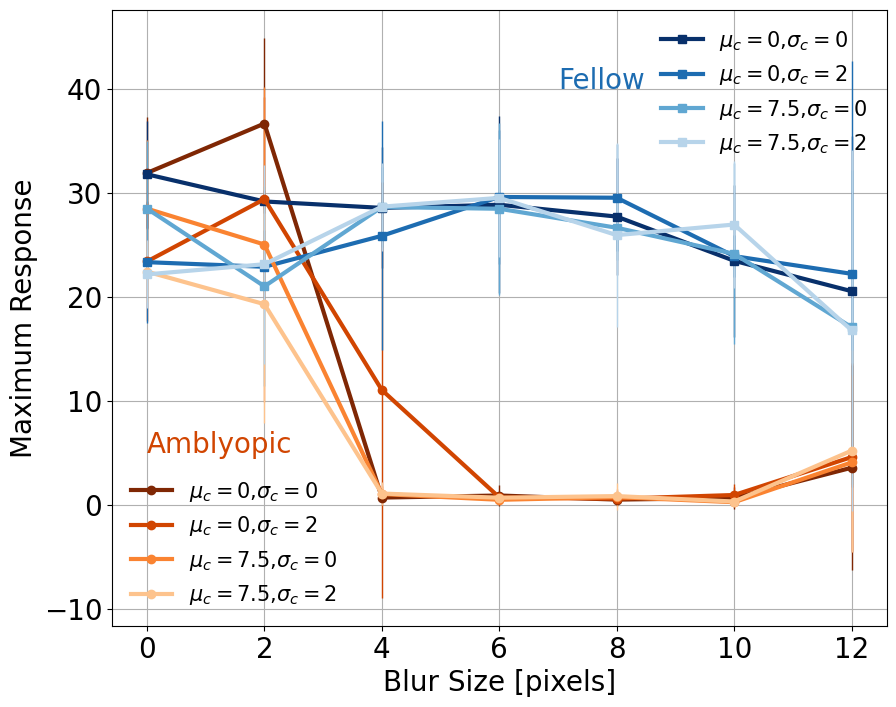

In [17]:
n = 10

colormap=cm.tab10
color = colormap(np.linspace(0, 1,n))


v=np.flip(linspace(0.3,1,4))

color_count=0
count=0
h1=[]
h2=[]
labels=[]
for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        
        labels+=[f'$\mu_c={mu_c}$,$\sigma_c={sigma_c}$']
        
        s=Storage()
        for blur_count,blur in enumerate(blur_mat):


            params=all_params[count]
            count+=1

            R=RR[params.sfname]

            blur=params.blur
            μ1,μ2=R.μσ[0][0]
            σ1,σ2=R.μσ[1][0]

            s+=blur,μ1,μ2,σ1,σ2

        blur,μ1,μ2,σ1,σ2=s.arrays()
        h=errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Oranges(v[color_count]))
        h1+=[h[0]]
        h=errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Blues(v[color_count]))
        h2+=[h[0]]
        xlabel('Blur Size [pixels]')
        ylabel('Maximum Response')
        
        color_count+=1


# specify the lines and labels of the first legend
ax=gca()
ax.legend(h1, labels,
          loc='lower left', frameon=False,fontsize=15)

text(0,5,'Amblyopic',color=cm.Oranges(v[1]))

# # Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, h2, labels,
              loc='upper right', frameon=False,fontsize=15)
ax.add_artist(leg)
text(7,40,'Fellow',color=cm.Blues(v[1]))



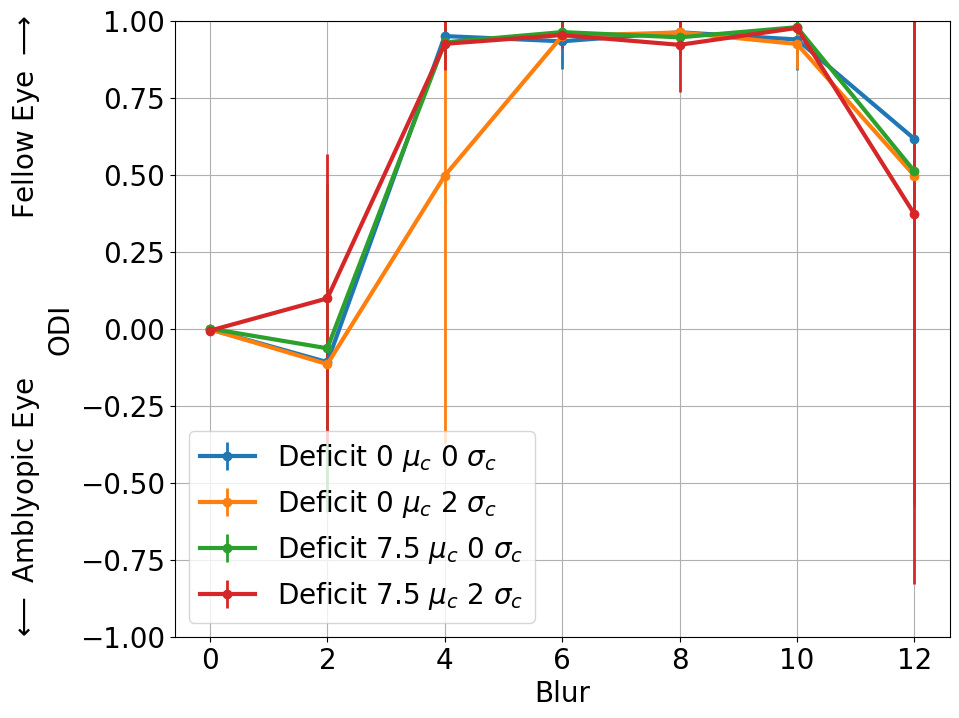

In [18]:
import cycler
colormap=cm.viridis

n = 10

colormap=cm.tab10
color = colormap(np.linspace(0, 1,n))

count=0
v=np.flip(linspace(0.3,1,4))


color_count=0
count=0
for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        s=Storage()
        for blur_count,blur in enumerate(blur_mat):


            params=all_params[count]
            count+=1

            R=RR[params.sfname]

            blur=params.blur
            μ,σ=μσ(R.ODI[-1])
            μ0,σ0=μσ(R.ODI[0])

            s+=blur,μ,σ,μ0,σ0


        blur,μ,σ,μ0,σ0=s.arrays()
        
        errorbar(blur,μ,yerr=2*σ,marker='o',elinewidth=2,color=color[color_count],
                label=f'Deficit {mu_c} $\mu_c$ {sigma_c} $\sigma_c$')    
        color_count+=1

xlabel('Blur')
ylabel(r'$\longleftarrow$ Amblyopic Eye                  Fellow Eye $\longrightarrow$'+"\nODI")
ylim([-1,1])
legend()


In [20]:
%%time
fname='sims/2023-04-06/fix_results.asdf'
loadvars(fname)
all_params=[Struct(_) for _ in all_params]

Found ['all_params', 'RR', 'rf_size', 'eta', 'number_of_neurons', 'number_of_processes', 'mu_c_mat', 'sigma_c_mat', 'blur_mat', 'noise_mat']
CPU times: user 37.5 s, sys: 7.98 s, total: 45.5 s
Wall time: 48.1 s
